# TP à rendre 3 Gradient, filtrage et morphologie
Dans ce TP, nous aimerions appliquer une analyse d'image en efféctuant:
- un calcul basique de gradient horizontal et vertical,
- un calcul du module et de l'orientation du gradient,
- un calcul du gradient en utilisant une convolution avec les filtres Sobel et Prewitt,
- un calcul du Laplacien du Gaussien (dérivée seconde de l'image)
- un filtrage de l'image avec un filtre médian, gaussien et un filtre moyen et comparer la difference,
- un seuillage de l'image,
- des morphologies mathématiques (dilatation et érosion),
L'objectif est d'observer le résultat pour chaque opération et de comparer les differentes méthodes.

In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib as mpl

In [57]:
# préparation de l'image
image = np.zeros((8,8))
image[0,0]=0;image[0,1]=12;image[0,2]=53;image[0,3]=32;image[0,4]=190;image[0,5]=53;image[0,6]=174;image[0,7]=53;
image[1,0]=57;image[1,1]=32;image[1,2]=12;image[1,3]=227;image[1,4]=219;image[1,5]=202;image[1,6]=32;image[1,7]=154;
image[2,0]=65;image[2,1]=85;image[2,2]=93;image[2,3]=239;image[2,4]=251;image[2,5]=227;image[2,6]=65;image[2,7]=158;
image[3,0]=73;image[3,1]=146;image[3,2]=146;image[3,3]=247;image[3,4]=255;image[3,5]=235;image[3,6]=154;image[3,7]=130;
image[4,0]=97;image[4,1]=166;image[4,2]=117;image[4,3]=231;image[4,4]=243;image[4,5]=210;image[4,6]=117;image[4,7]=117;
image[5,0]=117;image[5,1]=190;image[5,2]=36;image[5,3]=146;image[5,4]=178;image[5,5]=93;image[5,6]=20;image[5,7]=170;
image[6,0]=130;image[6,1]=202;image[6,2]=73;image[6,3]=20;image[6,4]=12;image[6,5]=53;image[6,6]=85;image[6,7]=194;
image[7,0]=146;image[7,1]=206;image[7,2]=130;image[7,3]=117;image[7,4]=85;image[7,5]=166;image[7,6]=182;image[7,7]=215;
image

array([[  0.,  12.,  53.,  32., 190.,  53., 174.,  53.],
       [ 57.,  32.,  12., 227., 219., 202.,  32., 154.],
       [ 65.,  85.,  93., 239., 251., 227.,  65., 158.],
       [ 73., 146., 146., 247., 255., 235., 154., 130.],
       [ 97., 166., 117., 231., 243., 210., 117., 117.],
       [117., 190.,  36., 146., 178.,  93.,  20., 170.],
       [130., 202.,  73.,  20.,  12.,  53.,  85., 194.],
       [146., 206., 130., 117.,  85., 166., 182., 215.]])

In [ ]:
#lecture de l'image
#image =cv.imread('yourImage.png',0)
#décommenter au besoin

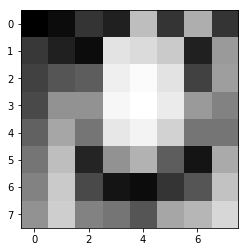

In [7]:
plt.imshow(image,cmap='gray')

# Calcul du gradient de l'image

Définir d'abord une fonction de convolution  
**Astuce**: pour ajouter du padding il est possible d'utiliser la fonction cv.copyMakeBorder

In [19]:
def convolution(image,filtre):
    
    return imageC

Gradient par rapport à x  

Gradient par rapport à y

Magnitude du Gradient $Mod(G(i,j)) = \sqrt{(G_x(i,j)^2+G_y(j,j)^2} $

Orientation du gradient $\theta = tan^{-1}\left( \frac{G_y(i,j) }{G_x(j,j)}\right) $  
**Astuce** Il est possible d'utiliser la fonction np.arctan2, mais elle retourne les valeurs en radians. Il est possible de les convertir en degrees soit manuellement, soit en utilisant math.degrees

# Binarisation de l'image  
D'abord binariser l'image en fonction de la magnitude comme vu en TD (G(i,j)>70)  
Ensuite binariser en fonction du niveau de gris (I(x,y)>70)  
Observer la difference entre les deux résultats,   
Qu'obtient-on  de chaque binarisation?

# Dilatation avec un élement structurant de type diamond

comparer avec opencv

In [61]:
kernel = np.ones((3,3), np.uint8)
# imageB est l'image après seuillage
imageDI = cv.dilate(imageB, kernel, iterations=1)
imagzER = cv.erode(imageB, kernel, iterations=1)

# Erosion avec un élément structurant de type carré 

# Dérivé avec filtres Prewitt et Sobel

D'abord définir les filtres

In [23]:
#Prewitt
c=1
# commenter et décommenter c au besoin
filtreP_x = np.array([[-1,0,1],[-c,0,c],[1,0,1]])
filtreP_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])
#Sobel
c=2
filtreS_x = np.array([[-1,0,1],[-c,0,c],[1,0,1]])
filtreS_y = np.array([[-1,-c,-1],[0,0,0],[1,c,1]])

Ensuite appliquer le filtre avec une convolution pour calculer la dérivé avec filtre Prewitt

dérivé par rapport à x

dérivé par rapport à y

Et appliquer le filtre avec une convolution pour calculer la dérivé avec filtre Sobel

dérivé par rapport à x

dérivé par rapport à y

# Comparer vos résultats avec opencv

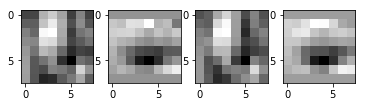

In [26]:
Gx_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_x)
Gy_Prewitt_cv=cv.filter2D(image,-1,kernel=filtreP_y)
Gx_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_x)
Gy_Sobel_cv=cv.filter2D(image,-1,kernel=filtreS_y)
plt.subplot(141)
plt.imshow(Gx_Prewitt_cv,cmap='gray')
plt.subplot(142)
plt.imshow(Gy_Prewitt_cv,cmap='gray')
plt.subplot(143)
plt.imshow(Gx_Sobel_cv,cmap='gray')
plt.subplot(144)
plt.imshow(Gy_Sobel_cv,cmap='gray')

# Deuxième dérivé de l'image
Convolution avec l'opérateur Laplacien

In [27]:
filtre_Lap = np.array([[0,1,0],[1,-4,1],[0,1,0]])

Appliquer la convolution 

comparer avec opencv

Filtre Moyen

Appliquer la convolution

comparer avec opencv

In [28]:
# taille de fenetre F
F=3
filtreMoy = np.ones((F,F),np.float32)/(F*F)
imageMoy=cv.filter2D(image,-1,filtreMoy)
# ou bien utiliser la fonction cv.blur
imageMoy = cv.blur(image,(F,F))

Filtre Gaussien

In [47]:
sigma=1
F=3
# caluler le filtre avec la formule donnée en cours/TD



appliquer la convolution en utilisant le filtre créé

Appliquer la convolution et comparer avec opencv

In [52]:
imageG= cv.GaussianBlur(image, (F,F),cv.BORDER_DEFAULT)

Filtre médian

Comparer avec opencv

In [59]:
imageMed = cv.medianBlur(image,F)

# Tester avec les autres images

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 28 novembre 2021 à 23:00


In [ ]:
# bonne chance